In [1]:
import pyift.pyift as ift
import matplotlib.pyplot as plt

### Segment blood cells using a sequence of image operators, including some connected ones

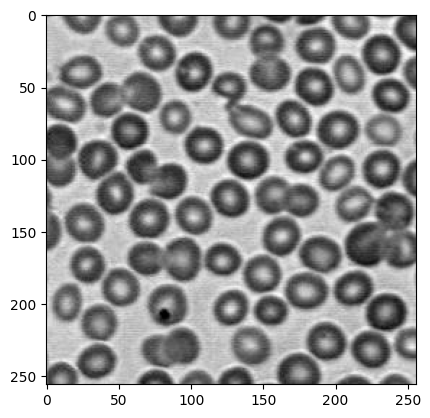

In [2]:
img = ift.ReadImageByExt("images/bloodcells.png")
plt.imshow(img.ToPlot())

#### A first idea might be removing the nuclei of the cells (domes) by applying an opening filter. However, this creates false connections among cells.  

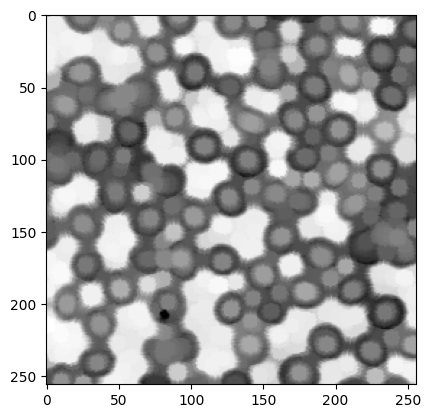

In [11]:
A    = ift.Circular(5.0)
open = ift.Open(img, A, None)
plt.imshow(open.ToPlot())

#### A connected operator, such as the inferior reconstruction can correct the problem of false connections. Its dual operation to correct false connections from closing operations is the superior reconstruction. 

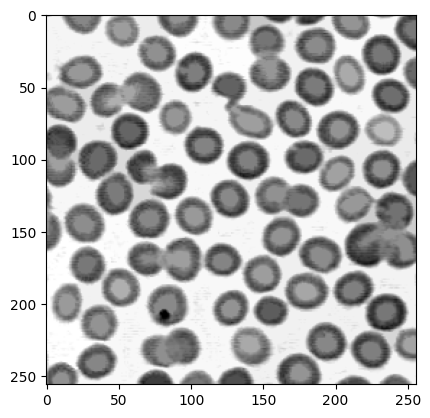

In [13]:
# This sequence of operations, opening + inferior reconstructions,
# is equivalent to ift.OpenRec(img, A, None), whose dual is
# ift.CloseRec(img, A, None)

orec = ift.InferiorRec(img, open, None)
plt.imshow(orec.ToPlot())

#### Alternatively, in a binary image, a morphological area opening removes connected components whose areas are below a given area threshold. A gray-scale image I with pixel values I(p) in [0, L-1] can be decomposed into a set of L binary images B, such that B(p)=1, if I(p) >= T, for T=0, 1,..., L-1, and B(p)=0, otherwise. In such a case, a morphological area opening removes all level components whose areas are below a given area threshold. By recomposing the gray-scale image, its domes will be flattened. The dual operation is a morphological area closing and it applies for closing image basins rather than opening domes. 

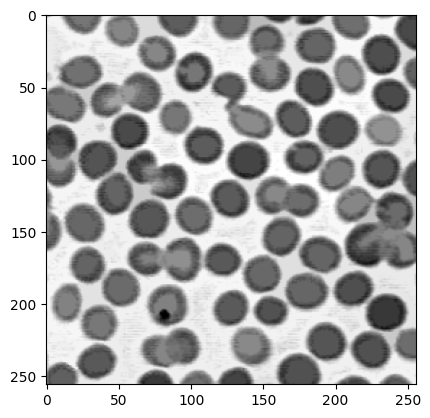

In [3]:
aopen = ift.FastAreaOpen(img, 300)
plt.imshow(aopen.ToPlot())

#### By considering the volumes of domes and basins in the thresholding decomposition above, one can produce similar effects of opening domes and closing basins in a gray-scale image. Indeed, one can create a max-tree and filter the image by height, area or volume of the domes. The respective dual operations are applied to a min-tree. 

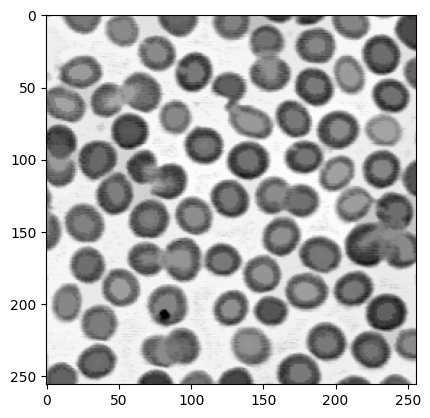

In [4]:
# The max-tree is created inside the function if you call 
# vopen = ift.VolumeOpen(img, 5000, None)
maxtree = ift.CreateMaxTree(img)
vopen   = ift.VolumeOpen(img, 5000, maxtree)
plt.imshow(vopen.ToPlot())

#### Binarizing any of the previous filtered images and computing the Euclidean distance transform is an strategy towards separating the cells.

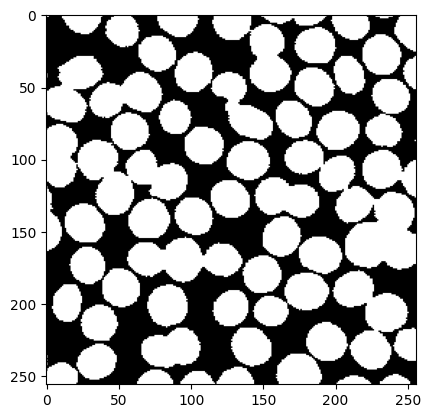

In [5]:
bin = ift.Threshold(vopen,0,150,255)
plt.imshow(bin.ToPlot())

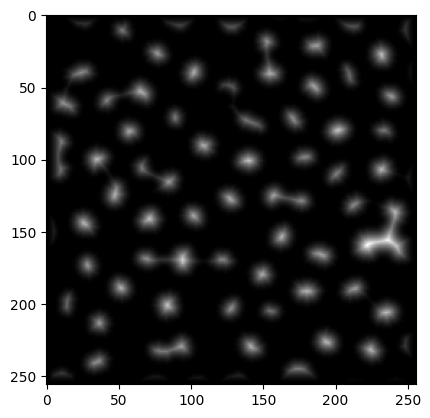

In [6]:
A     = ift.Circular(1.5)
elist = ift.EuclDistTrans(bin, A, ift.IFT_INTERIOR, None, None, None)
edt   = elist[0] # squared distance transform
plt.imshow(edt.ToPlot())

#### In a (dual)watershed from a gray-scale marker, the maxima of the edt will become the root set of an image foresting transform such that each maximum will compete for its most strongly connected pixels. One can then assign a distinct label to each maximum and propagate that label to its optimum-path tree. By applying the binary mask above, the labeled image will present separated cells. 

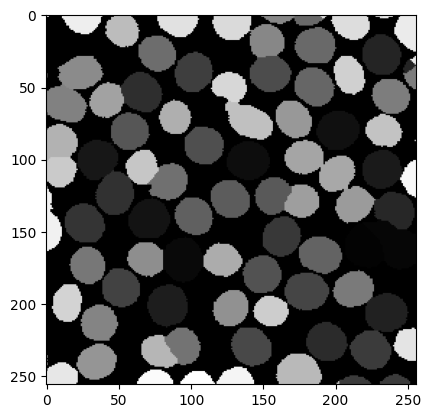

In [7]:
marker = ift.AddValue(edt,-10)
label  = ift.DualWaterGray(edt,marker,A)
label  = ift.Mask(label,bin)
plt.imshow(label.ToPlot())

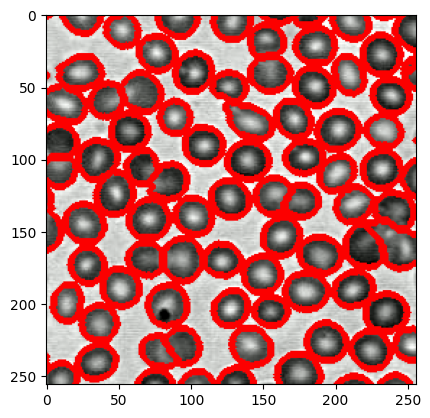

In [8]:
border = ift.BorderImage(label,False);
A      = ift.Circular(1.0);
RGB    = ift.Color()
RGB.SetValues((255,0,0))
YCbCr  = ift.RGBtoYCbCr(RGB,255)
cimg   = ift.CopyImage(img)
ift.DrawBorders(cimg,border,A,YCbCr,A)
plt.imshow(cimg.ToPlot())